In [1]:
pip install pandas seaborn matplotlib missingno


  Using cached missingno-0.5.2-py3-none-any.whl.metadata (639 bytes)
Using cached missingno-0.5.2-py3-none-any.whl (8.7 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno  # You might need to install this: pip install missingno

# Load your dataset (replace with actual file path if needed)
df = pd.read_csv("Data/student_sleep_patterns.csv")

print("🔍 DATASET PREVIEW")
print("-" * 40)

#  Shape and preview
print(f"🧾 Rows: {df.shape[0]} | Columns: {df.shape[1]}")
print("\n📌 Sample Data:")
display(df.head(5))



🔍 DATASET PREVIEW
----------------------------------------
🧾 Rows: 500 | Columns: 14

📌 Sample Data:


,Student_ID,Age,Gender,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End
0,1,24,Other,2nd Year,7.7,7.9,3.4,2,37,10,14.16,4.05,7.41,7.06
1,2,21,Male,1st Year,6.3,6.0,1.9,5,74,2,8.73,7.10,8.21,10.21
2,3,22,Male,4th Year,5.1,6.7,3.9,5,53,5,20.00,20.47,6.88,10.92
3,4,24,Other,4th Year,6.3,8.6,2.8,4,55,9,19.82,4.08,6.69,9.42
4,5,20,Male,4th Year,4.7,2.7,2.7,0,85,3,20.98,6.12,8.98,9.01


In [3]:
df.head(20)

,Student_ID,Age,Gender,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End
0,1,24,Other,2nd Year,7.7,7.9,3.4,2,37,10,14.16,4.05,7.41,7.06
1,2,21,Male,1st Year,6.3,6.0,1.9,5,74,2,8.73,7.10,8.21,10.21
2,3,22,Male,4th Year,5.1,6.7,3.9,5,53,5,20.00,20.47,6.88,10.92
3,4,24,Other,4th Year,6.3,8.6,2.8,4,55,9,19.82,4.08,6.69,9.42
4,5,20,Male,4th Year,4.7,2.7,2.7,0,85,3,20.98,6.12,8.98,9.01
5,6,25,Other,1st Year,4.9,12.0,3.2,3,96,9,9.80,18.83,5.04,10.51
6,7,22,Female,2nd Year,6.5,11.7,3.4,1,99,6,13.05,20.96,8.58,10.81
7,8,22,Male,2nd Year,6.1,7.8,3.0,1,108,4,10.49,10.85,5.60,10.02
8,9,24,Female,1st Year,8.6,2.4,1.4,1,86,7,11.06,18.88,8.14,8.78
9,10,19,Other,2nd Year,5.8,8.2,2.0,3,44,8,14.65,5.31,7.47,9.37


In [4]:
# Data types
print("\n📦 Data Types:")
print(df.dtypes)

#  Missing values
print("\n❓ Missing Values:")
missing = df.isnull().sum()
print(missing[missing > 0] if missing.sum() > 0 else "✅ No missing values found.")



📦 Data Types:
Student_ID               int64
Age                      int64
Gender                  object
University_Year         object
Sleep_Duration         float64
Study_Hours            float64
Screen_Time            float64
Caffeine_Intake          int64
Physical_Activity        int64
Sleep_Quality            int64
Weekday_Sleep_Start    float64
Weekend_Sleep_Start    float64
Weekday_Sleep_End      float64
Weekend_Sleep_End      float64
dtype: object

❓ Missing Values:
✅ No missing values found.


In [5]:
# 4. Descriptive statistics
print("\n📈 Descriptive Statistics:")
display(df.describe().T)



📈 Descriptive Statistics:


,count,mean,std,min,25%,50%,75%,max
Student_ID,500.0,250.50000,144.481833,1.00,125.7500,250.500,375.2500,500.00
Age,500.0,21.53600,2.333150,18.00,20.0000,21.000,24.0000,25.00
Sleep_Duration,500.0,6.47240,1.485764,4.00,5.1000,6.500,7.8000,9.00
Study_Hours,500.0,5.98160,3.475725,0.10,2.9000,6.050,8.8000,12.00
Screen_Time,500.0,2.52500,0.859414,1.00,1.8000,2.600,3.3000,4.00
Caffeine_Intake,500.0,2.46200,1.682325,0.00,1.0000,2.000,4.0000,5.00
Physical_Activity,500.0,62.34200,35.191674,0.00,32.7500,62.500,93.2500,120.00
Sleep_Quality,500.0,5.36200,2.967249,1.00,3.0000,5.000,8.0000,10.00
Weekday_Sleep_Start,500.0,11.16686,5.972352,1.08,6.0875,10.635,16.1525,21.93
Weekend_Sleep_Start,500.0,12.37586,5.789611,2.05,7.2975,12.690,17.3275,22.00


In [6]:
# Categorize sleep duration into Low, Medium, High
df["Sleep_Category"] = pd.qcut(df["Sleep_Duration"], q=3, labels=["Low", "Medium", "High"])


In [7]:
print(df.columns.tolist())


['Student_ID', 'Age', 'Gender', 'University_Year', 'Sleep_Duration', 'Study_Hours', 'Screen_Time', 'Caffeine_Intake', 'Physical_Activity', 'Sleep_Quality', 'Weekday_Sleep_Start', 'Weekend_Sleep_Start', 'Weekday_Sleep_End', 'Weekend_Sleep_End', 'Sleep_Category']


In [8]:
categorical_features = ["Gender", "University_Year"]


Sleep_Category,Low,Medium,High
Gender,,,
Female,56,52,58
Male,66,66,54
Other,47,56,45


🔍 Feature: Gender
Chi² = 2.374 | p-value = 0.6674 | DoF = 4


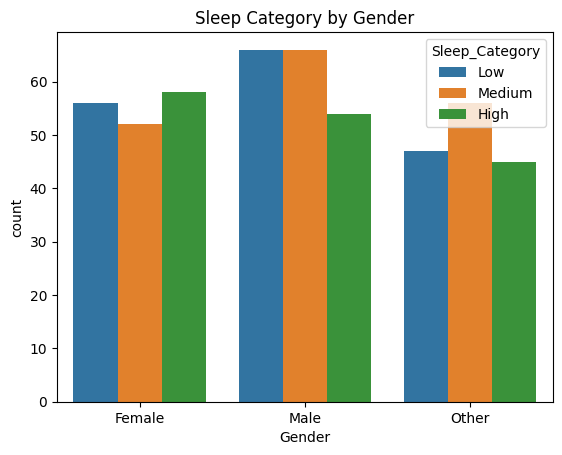

Sleep_Category,Low,Medium,High
University_Year,,,
1st Year,42,48,35
2nd Year,40,46,45
3rd Year,49,35,48
4th Year,38,45,29


🔍 Feature: University_Year
Chi² = 7.791 | p-value = 0.2538 | DoF = 6


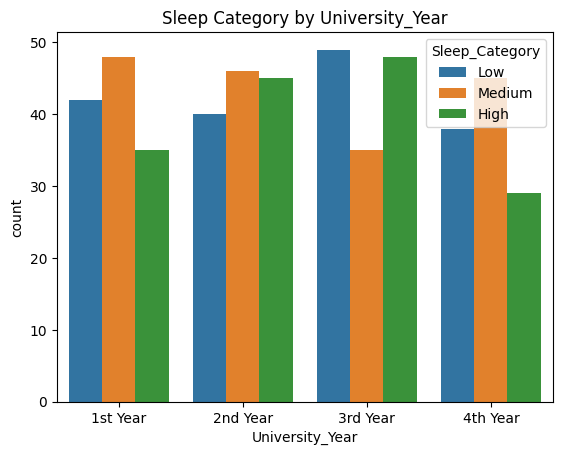

In [9]:
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

# Bin sleep duration
df["Sleep_Category"] = pd.qcut(df["Sleep_Duration"], q=3, labels=["Low", "Medium", "High"])

# Use actual categorical features from your data
categorical_features = ["Gender", "University_Year"]

for feat in categorical_features:
    df[feat] = df[feat].astype("category")
    
    contingency = pd.crosstab(df[feat], df["Sleep_Category"])
    display(contingency)

    chi2, p, dof, expected = chi2_contingency(contingency)
    print(f"🔍 Feature: {feat}")
    print(f"Chi² = {chi2:.3f} | p-value = {p:.4f} | DoF = {dof}")
    
    sns.countplot(x=feat, hue="Sleep_Category", data=df)
    plt.title(f"Sleep Category by {feat}")
    plt.show()


In [54]:
def label_sleep(hours):
    if hours >= 8:
        return "Long"
    elif hours >= 6:
        return "Normal"
    else:
        return "Short"

df["Sleep_Category"] = df["Sleep_Duration"].apply(label_sleep)


<Axes: xlabel='Sleep_Category', ylabel='count'>

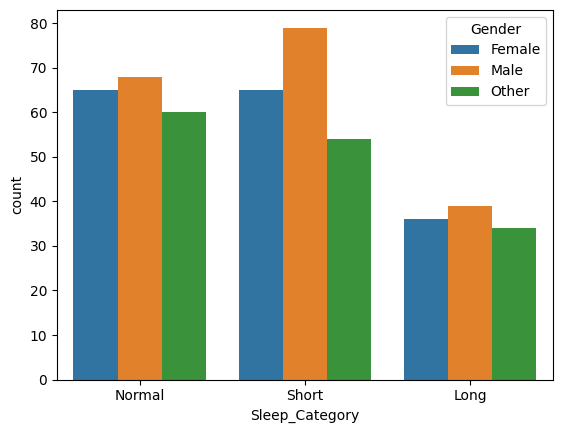

In [55]:
sns.countplot(x="Sleep_Category", hue="Gender", data=df)


In [10]:
import pandas as pd

# Load dataset
df = pd.read_csv("Data/student_sleep_patterns.csv")  # Replace with your actual filename

# Drop Student_ID
df = df.drop(columns=["Student_ID"])

# Define features, including categorical
X = df[[
    "Age",
    "Study_Hours",
    "Screen_Time",
    "Caffeine_Intake",
    "Physical_Activity",
    "Sleep_Quality",
    "Gender",
    "University_Year"
]]

y = df["Sleep_Duration"]

# Output shape
print("X:", X.shape)
print("y:", y.shape)


X: (500, 8)
y: (500,)


In [11]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [12]:
# Check data types
numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns
categorical_cols = X.select_dtypes(include=["object", "category"]).columns

print("Numerical columns:", list(numerical_cols))
print("Categorical columns:", list(categorical_cols))

Numerical columns: ['Age', 'Study_Hours', 'Screen_Time', 'Caffeine_Intake', 'Physical_Activity', 'Sleep_Quality']
Categorical columns: ['Gender', 'University_Year']


In [13]:
# Numerical pipeline
numerical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    # ("scaler", StandardScaler()),  # Optional: Add if you plan to scale
])

# Categorical pipeline
categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(drop="first", handle_unknown="ignore"))
])

# Combine pipelines into column transformer
preprocessor = ColumnTransformer(transformers=[
    ("num", numerical_pipeline, numerical_cols),
    ("cat", categorical_pipeline, categorical_cols)
])

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())
])


In [15]:
from sklearn.model_selection import train_test_split
import gc

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    # stratify=y  # Remove this line if y is continuous (e.g., for regression)
)

# Display the shape of splits
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Collect garbage to free up memory
gc.collect()


(400, 8) (100, 8) (400,) (100,)


3593

In [16]:

model = model_pipeline.named_steps["regressor"]
print(model)


RandomForestRegressor()


In [17]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [18]:
encoded_columns = (
    model_pipeline[0]
    .transformers_[1][1]
    .named_steps["encoder"]
    .get_feature_names_out(categorical_cols)
)
# Combine the numerical columns and encoded categorical columns
all_columns = list(numerical_cols) + list(encoded_columns)

# Convert to DataFrame
X_train_df = pd.DataFrame(X_train_processed, columns=all_columns)
X_test_df = pd.DataFrame(X_test_processed, columns=all_columns)
X_train_df.head(10)

,Age,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Gender_Male,Gender_Other,University_Year_2nd Year,University_Year_3rd Year,University_Year_4th Year
0,20.0,7.7,2.4,1.0,15.0,9.0,0.0,1.0,0.0,0.0,1.0
1,25.0,10.1,2.8,2.0,109.0,7.0,1.0,0.0,0.0,0.0,1.0
2,20.0,4.5,1.6,0.0,27.0,2.0,0.0,1.0,0.0,1.0,0.0
3,21.0,0.4,2.0,4.0,71.0,2.0,1.0,0.0,1.0,0.0,0.0
4,21.0,7.2,3.0,5.0,12.0,2.0,1.0,0.0,0.0,0.0,0.0
5,25.0,7.9,1.5,2.0,24.0,4.0,0.0,1.0,1.0,0.0,0.0
6,18.0,5.4,2.3,4.0,87.0,6.0,0.0,1.0,0.0,0.0,1.0
7,22.0,4.9,2.2,2.0,93.0,4.0,0.0,1.0,0.0,0.0,1.0
8,18.0,5.4,3.2,1.0,107.0,5.0,1.0,0.0,0.0,0.0,0.0
9,18.0,4.7,1.4,2.0,104.0,3.0,1.0,0.0,0.0,0.0,1.0


In [19]:
model_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  Index(['Age', 'Study_Hours', 'Screen_Time', 'Caffeine_Intake',
       'Physical_Activity', 'Sleep_Quality'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  Index(['Gender', 'University_Year'], dtype='object'))])),
                ('regressor', RandomForestRegressor())])

In [20]:
print(y_train[:10])
print(type(y_train))
print(y_train.dtype)


249    7.4
433    8.0
19     9.0
322    7.5
332    8.1
56     8.0
301    5.3
229    6.0
331    4.1
132    4.4
Name: Sleep_Duration, dtype: float64
<class 'pandas.core.series.Series'>
float64


In [21]:
y_pred = model_pipeline.predict(X_test)
model.score(X_test_df, y_test)

d:\DATA 200\data200-project-triplevision\env\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


-0.04668090905467048

Top factors influencing sleep duration:
                    Feature  Importance
4         Physical_Activity    0.218725
1               Study_Hours    0.208744
2               Screen_Time    0.163137
5             Sleep_Quality    0.118340
0                       Age    0.090812
3           Caffeine_Intake    0.081687
6               Gender_Male    0.026880
8  University_Year_2nd Year    0.024589
9  University_Year_3rd Year    0.023849
7              Gender_Other    0.021844


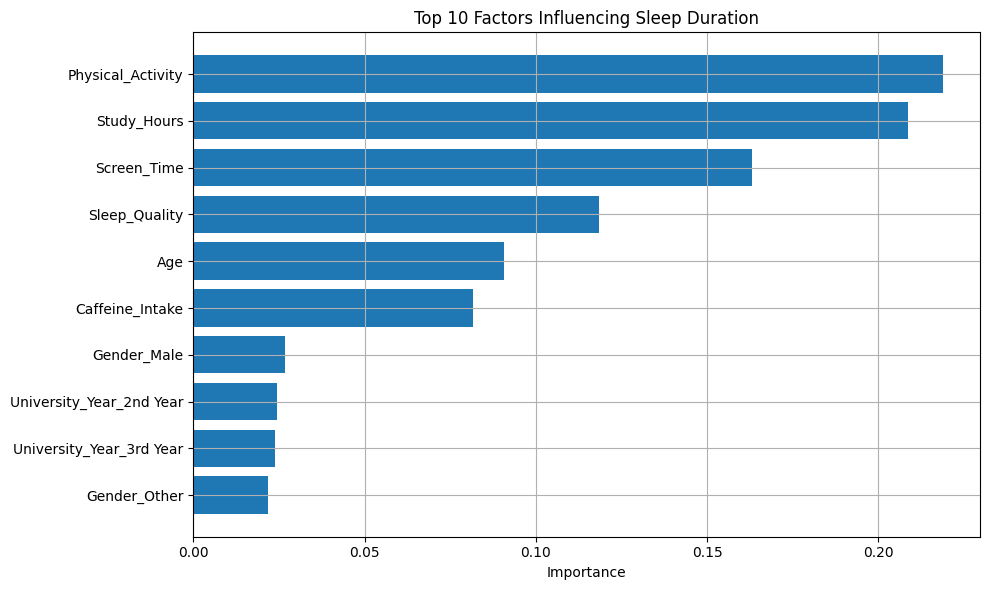

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract feature importances from the Random Forest
model = model_pipeline.named_steps["regressor"]
importances = model.feature_importances_

# Get encoded feature names from the preprocessor
encoded_cat_cols = model_pipeline.named_steps["preprocessor"]\
    .transformers_[1][1]\
    .named_steps["encoder"]\
    .get_feature_names_out(categorical_cols)

# Combine column names
final_feature_names = list(numerical_cols) + list(encoded_cat_cols)

# Create a DataFrame of feature importances
feature_importance_df = pd.DataFrame({
    "Feature": final_feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Show top features
print("Top factors influencing sleep duration:")
print(feature_importance_df.head(10))

# Optional: plot it
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df["Feature"][:10][::-1], feature_importance_df["Importance"][:10][::-1])
plt.xlabel("Importance")
plt.title("Top 10 Factors Influencing Sleep Duration")
plt.tight_layout()
plt.grid(True)
plt.show()


In [23]:
import pickle

# Save the pipeline to a file
with open("models/model_pipeline.pkl", "wb") as f:
    pickle.dump(model_pipeline, f)